In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [3]:
!pip list

Package                       Version
----------------------------- ------------
anaconda-anon-usage           0.4.3
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
beautifulsoup4                4.12.2
bleach                        4.1.0
Brotli                        1.0.9
certifi                       2023.7.22
cffi                          1.15.1
chardet                       4.0.0
charset-normalizer            2.0.4
click                         8.1.7
clyent                        1.2.2
colorama                      0.4.6
comm                          0.1.2
conda 

In [3]:
#Loading the data and setting column name
df1 = pd.read_csv('C:\\Users\\arsam\\Desktop\\amazon_rating.csv',names=['userId', 'productId','rating','timestamp'])

In [4]:
df1.head(20)

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [5]:
df1.shape

(7824482, 4)

In [6]:
electronics_data=df1.sample(n=1564896,ignore_index=True)

In [7]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A2K33P1XVVE7FA,B004NQMCDK,2.0,1394755200
1,A27CWOPS5XFABX,B00H9KSKH4,4.0,1403136000
2,A3B6UM8QZVGXUH,B007UMLEWO,3.0,1394496000
3,A3PEN6QYD595M5,B001J85BS8,5.0,1392508800
4,A320UJX5JSHDM8,B002S53LJ2,5.0,1308268800


In [8]:
electronics_data.shape

(1564896, 4)

In [9]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [10]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [11]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.011327e+00
std,1.381863e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [12]:
electronics_data.head()

,userId,productId,rating
0,A2K33P1XVVE7FA,B004NQMCDK,2.0
1,A27CWOPS5XFABX,B00H9KSKH4,4.0
2,A3B6UM8QZVGXUH,B007UMLEWO,3.0
3,A3PEN6QYD595M5,B001J85BS8,5.0
4,A320UJX5JSHDM8,B002S53LJ2,5.0


In [13]:
# Summary statistics for numerical columns
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.011327e+00
std,1.381863e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


# Missing Value Analysis and Treatment

In [14]:
Total = electronics_data.isnull().sum().sort_values(ascending=False)          
Percent = ((electronics_data.isnull().sum()/len(df1))*100).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
userId,0,0.0
productId,0,0.0
rating,0,0.0


# we can see that there is no missing values in entire dataframe

In [15]:
duplicates =electronics_data [electronics_data.duplicated()]
duplicates

,userId,productId,rating


In [ ]:
# we can see that there is no duplicates in this dataset

# Rating distribution

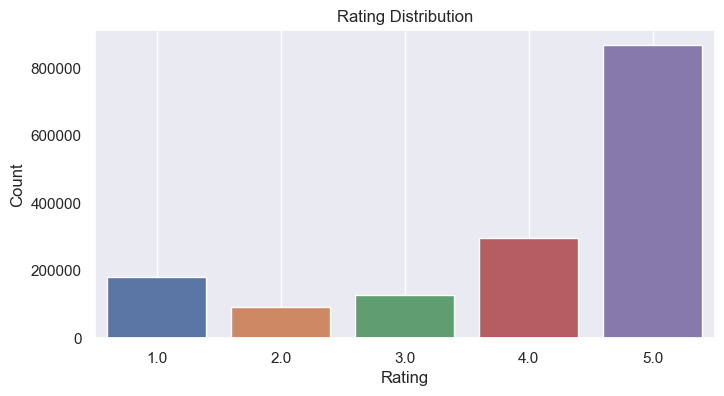

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [ ]:
# we can see that rating 5 is used maximum by users

In [17]:
print('Total rating : ',len(electronics_data))
print('Total unique users : ',electronics_data['userId'].nunique())
print('Total unique products : ',electronics_data['productId'].nunique())

Total rating :  1564896
Total unique users :  1226094
Total unique products :  237630


# no. of products rated by each user

In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
ADLVFFE4VBT8      111
A5JLAU2ARJ0BO     106
A6FIAB28IS79       97
A3OXHLG6DIBRW8     94
A1ODOGXEYECQQ8     84
Name: rating, dtype: int64

# Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

<Axes: xlabel='productId'>

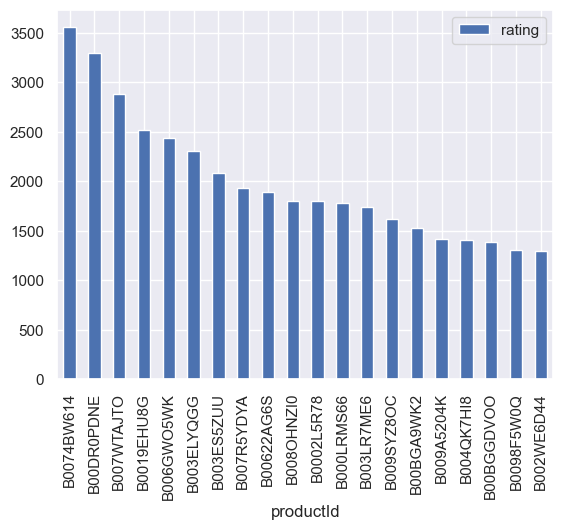

In [66]:
No_of_ratings_per_product= pd.DataFrame(electronics_data.groupby('productId')['rating'].count())
Top_rated_products = No_of_ratings_per_product.sort_values('rating', ascending = False)
Top_rated_products.head(20).plot(kind = 'bar')

In [69]:
Top20_popular_products = list(Top_rated_products.index[:20])

In [70]:
Top20_popular_products

['B0074BW614',
 'B00DR0PDNE',
 'B007WTAJTO',
 'B0019EHU8G',
 'B006GWO5WK',
 'B003ELYQGG',
 'B003ES5ZUU',
 'B007R5YDYA',
 'B00622AG6S',
 'B008OHNZI0',
 'B0002L5R78',
 'B000LRMS66',
 'B003LR7ME6',
 'B009SYZ8OC',
 'B00BGA9WK2',
 'B009A5204K',
 'B004QK7HI8',
 'B00BGGDVOO',
 'B0098F5W0Q',
 'B002WE6D44']

## Here are the top 20 most popular products to be displayed by the recommendation system  in the Homepage for all customers based on the ratings by overall customers in the   E_commerce website.

In [22]:
#average rating of each product
avg_rating_each_product=pd.DataFrame(electronics_data.groupby('productId')['rating'].mean())
avg_rating_each_product

,rating
productId,
0132793040,5.0
0511189877,5.0
0528881469,3.0
059400232X,5.0
0594012015,3.0
...,...
B00LMCPYPG,2.0
B00LMOH8DU,5.0
BT008T2BGK,5.0


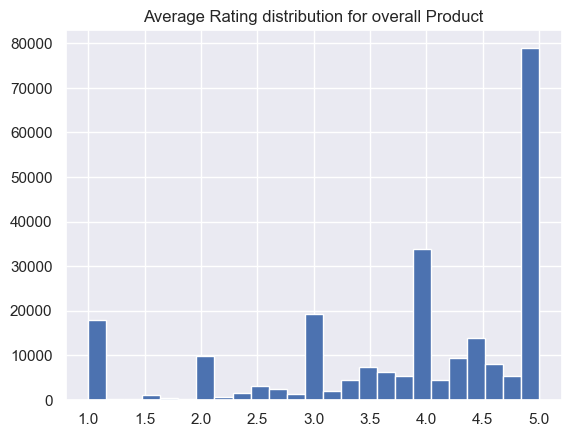

In [23]:
#plot the rating distribution of average rating product
plt.hist(avg_rating_each_product['rating'],bins=25)
plt.title('Average Rating distribution for overall Product')
plt.show()

In [24]:
avg_rating_each_product['rating_counts'] = pd.DataFrame(electronics_data.groupby('productId')['rating'].count())
avg_rating_each_product.head(25)

,rating,rating_counts
productId,,
0132793040,5.000000,1
0511189877,5.000000,1
0528881469,3.000000,2
059400232X,5.000000,1
0594012015,3.000000,2
0594017343,1.000000,1
0594033896,5.000000,2
0594033926,5.000000,2
0594296420,5.000000,1


In [25]:
#product which has highest avg rating:
avg_rating_each_product[avg_rating_each_product['rating_counts']==avg_rating_each_product['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.50225,3556


In [26]:
#product which has highest avg rating without taking no. of counts:
avg_rating_each_product[avg_rating_each_product['rating']==avg_rating_each_product['rating'].max()]

,rating,rating_counts
productId,,
0132793040,5.0,1
0511189877,5.0,1
059400232X,5.0,1
0594033896,5.0,2
0594033926,5.0,2
...,...,...
B00LI8Y9Y6,5.0,1
B00LKG1MC8,5.0,1
B00LMOH8DU,5.0,1


In [27]:
#product which has lowest avg rating:
avg_rating_each_product[avg_rating_each_product['rating_counts']==avg_rating_each_product['rating_counts'].min()]

,rating,rating_counts
productId,,
0132793040,5.0,1
0511189877,5.0,1
059400232X,5.0,1
0594017343,1.0,1
0594296420,5.0,1
...,...,...
B00LKG1MC8,5.0,1
B00LMCPYPG,2.0,1
B00LMOH8DU,5.0,1


## Item based Collaborative Filtering

In [28]:
data_rating50 = electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)
data_rating50

,userId,productId,rating
0,A2K33P1XVVE7FA,B004NQMCDK,2.0
2,A3B6UM8QZVGXUH,B007UMLEWO,3.0
3,A3PEN6QYD595M5,B001J85BS8,5.0
4,A320UJX5JSHDM8,B002S53LJ2,5.0
8,A28I47D3UERFSS,B000Q30420,2.0
...,...,...,...
1564888,A1KYIYS7EGCTOF,B00004THCZ,5.0
1564891,A1OZ32Y1DWTFL2,B003FZA1OW,5.0
1564893,A2XXPWEX9ZTIN3,B005C31HC0,4.0
1564894,A168142W467FC2,B007R5YDYA,5.0


In [29]:
#import surprise library for collebrative filtering
import surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [30]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data_rating50,reader)

In [31]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.2,random_state=42)

In [32]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [33]:
#make prediction using testset
test_pred=algo.test(testset)

In [34]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3104


1.3103961502535382

In [37]:
rw = surprise_data.raw_ratings

In [38]:
for x in rw[:50]:
    print(x)

('A2K33P1XVVE7FA', 'B004NQMCDK', 2.0, None)
('A3B6UM8QZVGXUH', 'B007UMLEWO', 3.0, None)
('A3PEN6QYD595M5', 'B001J85BS8', 5.0, None)
('A320UJX5JSHDM8', 'B002S53LJ2', 5.0, None)
('A28I47D3UERFSS', 'B000Q30420', 2.0, None)
('A336QM8SKS3PI6', 'B007WTAJTO', 5.0, None)
('A2K9XRSTU5FB36', 'B001CEYYFK', 5.0, None)
('A15TTQYG4JXX8Y', 'B0074BW614', 3.0, None)
('A2AO0D4A5WRSVT', 'B0011ZK6PC', 5.0, None)
('AMYEIYUNS9Q52', 'B0079R8KO0', 5.0, None)
('A3S84L5KIKXSNT', 'B00622AG6S', 4.0, None)
('A35XYARY5XOQB3', 'B005ONMDYE', 5.0, None)
('A3UBKHAF2E7QMJ', 'B00E055H5O', 5.0, None)
('A1153Y1AYX4I37', 'B00009UT28', 5.0, None)
('A1RDA2Q2C0JBR1', 'B003FJYLB2', 5.0, None)
('A2HTLGGA1KVCL9', 'B001GX6MJ8', 4.0, None)
('A31NUG7KEXUCV7', 'B00F3SOHNU', 4.0, None)
('A3QS2FG1JMZHUT', 'B000IKWBC2', 4.0, None)
('A1OW5EMTYH9KOO', 'B001GS8FZ2', 5.0, None)
('A1OSNUNNJGD3I9', 'B00APCMMDG', 4.0, None)
('A143FQIM4THUBX', 'B0035B4LJM', 4.0, None)
('A3K4U9HSQZPFSK', 'B00428AISA', 5.0, None)
('AJQJG8FGUEU75', 'B0074BW614', 5

# Collaberative filtering (User-Item recommedation):
## User-Item Collaborative Filtering: “Users who are similar to you also liked …”
## here we designed algorithm for "customers who rated this item also rated for......"
  In this method we will be using a well-known matrix factorization called Singular value decomposition (SVD). This technique will personalize our recommendation based on the similar group of users we derived from the above user-item interaction matrix. The below figure shows you how we came up with the set of recommendations for user#1. You can see that for each user, the set of recommendations will change based on the group of similar users, and the group of similar users will vary based on how user#1 interacts with each item.

In [39]:
data_rating50

,userId,productId,rating
0,A2K33P1XVVE7FA,B004NQMCDK,2.0
2,A3B6UM8QZVGXUH,B007UMLEWO,3.0
3,A3PEN6QYD595M5,B001J85BS8,5.0
4,A320UJX5JSHDM8,B002S53LJ2,5.0
8,A28I47D3UERFSS,B000Q30420,2.0
...,...,...,...
1564888,A1KYIYS7EGCTOF,B00004THCZ,5.0
1564891,A1OZ32Y1DWTFL2,B003FZA1OW,5.0
1564893,A2XXPWEX9ZTIN3,B005C31HC0,4.0
1564894,A168142W467FC2,B007R5YDYA,5.0


In [40]:
data2=data_rating50.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
# fill_value is used to fill the missing value in resultant table
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,...,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IT1WJZQ,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A00471742QKXLMG5CCZQO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00700212KB3K0MVESPIY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0110255Y4ER0RTKEKXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0113837FLTAB0T3ALFS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01248293RY3HQJ1HR745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19888, 4410)

In [42]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00471742QKXLMG5CCZQO,A00700212KB3K0MVESPIY,A0110255Y4ER0RTKEKXS,A0113837FLTAB0T3ALFS,A01248293RY3HQJ1HR745,A015127039CD56EIHHP92,A02508982X9VH3LX4Q2OM,A025153913CCRNHJK7SEP,A02641163VQ1HOUFJZM4O,A02683721QEDUB5PWPRSU,...,AZX7EZIIFMFI7,AZXEZRXZQL1H2,AZXHE07FAJ2DM,AZXIGU9MBPYW,AZXK5VO5HW8H4,AZXM27YOLHGWX,AZXXLE99LG5HB,AZY10LLTJ71NX,AZYUA07OVDOQH,AZZ5OWRZAD5TN
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x_ratings_matrix.shape

(4410, 19888)

In [45]:
#Decomposition of the matrix using Singular Value Decomposition technique
# n_components in SVD is basically trying to decipher the underlying drivers for similarities that are not explicitly defined.
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4410, 10)

In [46]:
decomposed_matrix

array([[ 2.04390682e-11, -3.04054138e-11,  3.73108565e-11, ...,
        -1.03838388e-09,  3.76592291e-10, -9.03079861e-10],
       [ 3.24612429e-11,  1.27096830e-11,  2.05891403e-10, ...,
        -1.41299186e-10, -3.17471044e-10, -9.84613563e-10],
       [-2.22945152e-10,  3.62791629e-10, -4.69852739e-10, ...,
         6.26124464e-09, -1.06933930e-08,  3.96341548e-10],
       ...,
       [-6.58898353e-08,  6.15412779e-07, -9.78214617e-07, ...,
         7.85346142e-06, -2.76962427e-06,  5.40768268e-06],
       [-1.01884766e-19, -1.44951905e-19, -4.82876253e-19, ...,
         6.11091286e-19,  2.84690974e-18,  1.52290879e-18],
       [ 4.22754774e-07,  1.44081773e-06, -1.06271071e-06, ...,
        -1.04285939e-05, -2.93442658e-05, -4.41557194e-05]])

In [47]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4410, 4410)

In [48]:
# select a random product and find other products which correlated with this product
x_ratings_matrix.index[10]

'B00000K2YR'

In [50]:
i="B00000K2YR"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

10


### Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [51]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4410,)

In [55]:
correlation_product_ID[5:]

array([ 0.81061224,  0.63115756,  0.77397076, ...,  0.22967232,
       -0.78407506,  0.795084  ])

In [52]:
correlation_matrix[correlation_product_ID>0.75].shape

(536, 4410)

In [57]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
# Removes the item already bought(or rated) by the customer
recommend.remove(i)
recommend[:20]

['1400532655',
 '140053271X',
 'B00000J061',
 'B00000JDF5',
 'B00002EQCW',
 'B00004TDLD',
 'B00004WCGF',
 'B00004WCID',
 'B00004ZCKV',
 'B000051ZOA',
 'B00005A1KZ',
 'B00005BC0K',
 'B00005ML7Q',
 'B00005T380',
 'B00005T39Y',
 'B00005T3G0',
 'B000065BP9',
 'B000067O5G',
 'B000067RVL',
 'B000068O3C']

## Here are the top 20 products to be displayed by the recommendation system to the above customer based on the ratings (or purchase) history of other customers in the website.